# **Customizing Templates for In-Context Learning**

As we have seem in the last notebook, there are some situations where the quality or ammount of demonstrations doesn't have a big effect on performance.For this third notebook we will test how different prompts can affect our results using question answering as our task.

In [ ]:
!pip install openai
!pip freeze

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.5/325.5 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.2 MB/s eta 0:00:00
absl-py==1.4.0
aiohttp==3.9.5
aiosignal==1.3.1
alabaster==0.7.16
albumentations==1.3.1
altair==4.2.2
annotated-types==0.7.0
anyio==3.7.1
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array_record==0.5.1
arviz==0.15.1
astropy==5.3.4
astunparse==1.6.3
async-timeout==4.0.3
atpublic==4.1.0
attrs==23.2.0
audioread==3.0.1
autograd==1.6.2
Babel==2.15.0
backcall==0.2.0
beautifulsoup4==4.12.3
bidict==0.23.1
bigframes==1.8.0
bleach==6.1.0
blinker==1.4
blis==0.7.11
blosc2==2.0.0
bokeh==3.3.4
bqplot==0.12.43
branca==0.7.2
build==1.2.1
CacheControl==0.14.0
cachetools==5.3.3
catalogue==2.0.10
certifi==2024.6.2
cffi==1.16.0
chardet==5.2.0
charset-normalizer==3.3.2
chex==0.1.86
clic

In [ ]:
import os
from openai import AzureOpenAI

client = AzureOpenAI(
  api_key = "",
  api_version = "2023-07-01-preview",
  azure_endpoint =  "https://openai-resource-for-multilingual.openai.azure.com/"
)

In [ ]:
def get_completion(prompt, model="gpt-35-turbo"):
    messages = [{"role": "user", "content": prompt}]
    response = client.chat.completions.create(
        model=model,
        messages=messages,
        temperature=0, # this is the degree of randomness of the model's output
    )
    #return response.choices[0].message["content"]
    return response.choices[0].message.content

## [State of What Art? A Call for Multi-Prompt LLM Evaluation](https://arxiv.org/abs/2401.00595)

Abstract: Recent advances in large language models (LLMs) have led to the development of various evaluation benchmarks. These benchmarks typically rely on a single instruction template for evaluating all LLMs on a specific task. In this paper, we comprehensively analyze the brittleness of results obtained via single-prompt evaluations across 6.5M instances, involving 20 different LLMs and 39 tasks from 3 benchmarks. To improve robustness of the analysis, we propose to evaluate LLMs with a set of diverse prompts instead. We discuss tailored evaluation metrics for specific use cases (e.g., LLM developers vs. developers interested in a specific downstream task), ensuring a more reliable and meaningful assessment of LLM capabilities. We then implement these criteria and conduct evaluations of multiple models, providing insights into the true strengths and limitations of current LLMs.




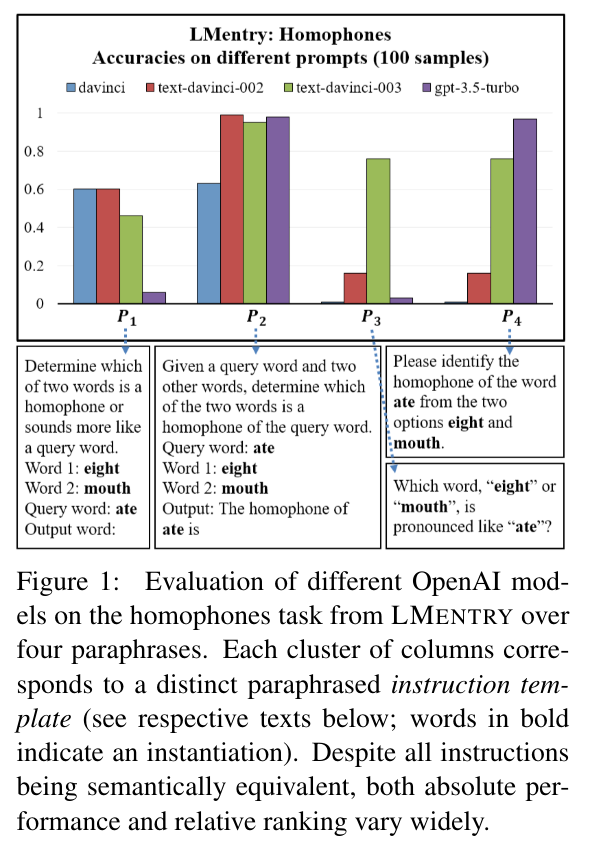

As we can see in the Figure 1, different template can have very different performance on the same task, on this notebook we will test a series of templates convined with the same ICL demonstrations for a question answering task and see if this affect the performance.

## First example
For the first example we considered a very minimalistic template without an actual explanation of the task.

In [ ]:
prompt = f"""
Context: Long distance migrants are believed to disperse as young birds and form attachments to potential breeding sites and to favourite wintering sites. Once the site attachment is made they show high site-fidelity, visiting the same wintering sites year after year

Question: What do young birds form attachments to? Answer: Young birds form attachments to potential breeding sites and to favourite wintering sites.
Question: When do short distance migrants disperse? Answer:
"""
response = get_completion(prompt)
print(response)

The context does not provide information about short distance migrants dispersing.


## Second example

In [ ]:
prompt = f"""
Context: Long distance migrants are believed to disperse as young birds and form attachments to potential breeding sites and to favourite wintering sites. Once the site attachment is made they show high site-fidelity, visiting the same wintering sites year after year

Question: What do young birds form attachments to? Answer: Young birds form attachments to potential breeding sites and to favourite wintering sites.
Question: When do short distance migrants disperse? Answer:

Please answer the question above using a passage present in the context. If no passage is a good answer for the question, please write "unanswerable" instead.
"""
response = get_completion(prompt)
print(response)

Unanswerable.


## Third example

In [ ]:
prompt = f"""
You will find below a context and a series of questions. Please answer the question or write "unanswerable" if the question cannot be answered using the context.

Context: Long distance migrants are believed to disperse as young birds and form attachments to potential breeding sites and to favourite wintering sites. Once the site attachment is made they show high site-fidelity, visiting the same wintering sites year after year

Question: What do young birds form attachments to? Answer: Young birds form attachments to potential breeding sites and to favourite wintering sites.
Question: When do short distance migrants disperse? Answer:
"""
response = get_completion(prompt)
print(response)

Unanswerable.


## Fourd example

In [ ]:
prompt = f"""
Question: What do young birds form attachments to? Answer: Young birds form attachments to potential breeding sites and to favourite wintering sites.
Question: When do short distance migrants disperse? Answer:

Context: Long distance migrants are believed to disperse as young birds and form attachments to potential breeding sites and to favourite wintering sites. Once the site attachment is made they show high site-fidelity, visiting the same wintering sites year after year.

The following context may contain an answer to the questions. If it does, please copy the span that best answers it. If it does not, mention that the question is "unanswerable" using the context.
"""
response = get_completion(prompt)
print(response)

The context does not provide an answer to the question.


## Exercise 3

Try to recreate the examples we just did using a different task, different language, etc. Try to come up with your own different templates rephrasing the instruction, changing the wording, the tone, etc.